<a href="https://colab.research.google.com/github/falcaodf/Sistema_de_Recomendacao/blob/main/Sistema_recomendacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Baixando imagens para a classe: sneakers
Baixando imagens para a classe: handbag
Baixando imagens para a classe: watch


ERROR:downloader:Exception caught when downloading file https://api.ecom.longines.com/media/catalog/product/w/a/watch-collection-longines-spirit-zulu-time-1925-l3-803-5-53-6-1746639103-thumbnail.png, error: HTTPSConnectionPool(host='api.ecom.longines.com', port=443): Read timed out. (read timeout=5), remaining retry times: 2
ERROR:downloader:Exception caught when downloading file https://api.ecom.longines.com/media/catalog/product/w/a/watch-collection-longines-spirit-zulu-time-1925-l3-803-5-53-6-1746639103-thumbnail.png, error: HTTPSConnectionPool(host='api.ecom.longines.com', port=443): Read timed out. (read timeout=5), remaining retry times: 1
ERROR:downloader:Exception caught when downloading file https://api.ecom.longines.com/media/catalog/product/w/a/watch-collection-longines-spirit-zulu-time-1925-l3-803-5-53-6-1746639103-thumbnail.png, error: HTTPSConnectionPool(host='api.ecom.longines.com', port=443): Read timed out. (read timeout=5), remaining retry times: 0
ERROR:downloader:Ex

Download concluído!
Produtos disponíveis:


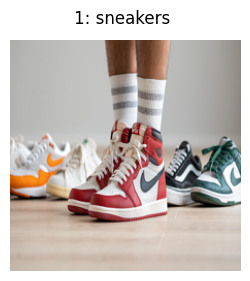

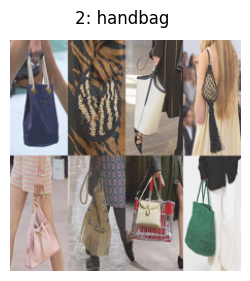

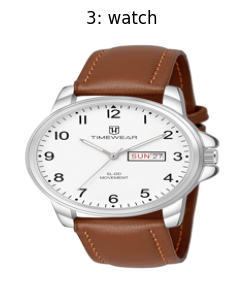

Escolha um produto digitando um número (1-3): 3

Você escolheu: watch

Mostrando produto escolhido e imagens similares:
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


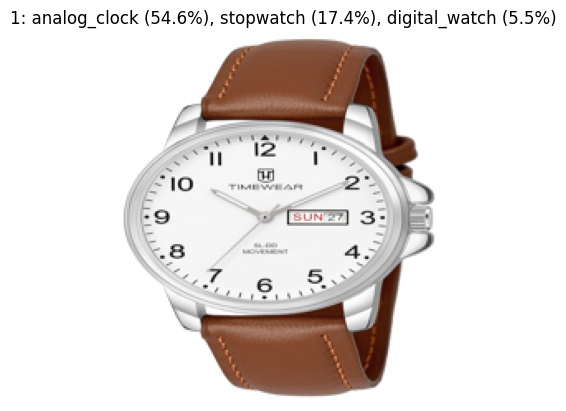

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


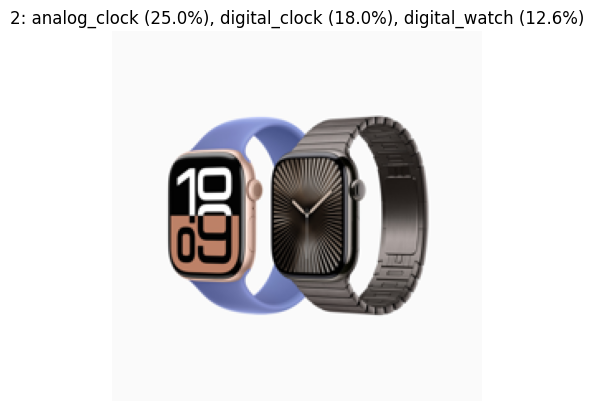

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


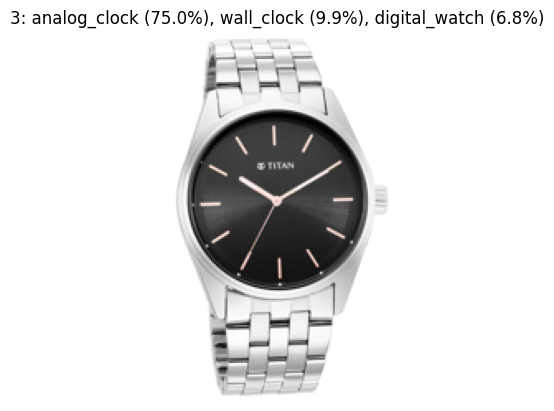

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


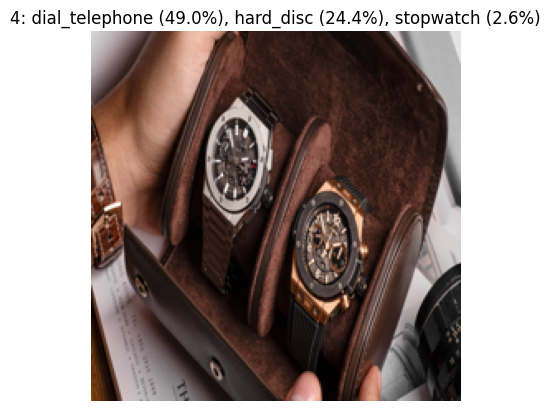

In [9]:
!pip install icrawler tensorflow tensorflow_hub --upgrade -q

import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import io
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
from icrawler.builtin import GoogleImageCrawler
import urllib.request


classes = ["sneakers", "handbag", "watch"] # DEFINIR CLASSES
base_dir = "/content/dataset"

if not os.path.exists(base_dir):
    os.makedirs(base_dir)

# BAIXAR 4 IMAGENS POR CLASSE
for cls in classes:
    cls_dir = os.path.join(base_dir, cls)
    if not os.path.exists(cls_dir):
        os.makedirs(cls_dir)

    print(f"Baixando imagens para a classe: {cls}")

    google_crawler = GoogleImageCrawler(storage={"root_dir": cls_dir})
    google_crawler.crawl(
        keyword=cls,
        max_num=4,
        min_size=(224,224),
        filters={"type":"photo"}
    )

print("Download concluído!")


# CARREGAR MODELO PRÉ-TREINADO

model = EfficientNetB0(weights='imagenet')

def load_img_from_path(path, target_size=(224,224)):
    img = Image.open(path).convert('RGB')
    img = img.resize(target_size)
    return img

def img_to_array(img):
    x = np.array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return x

def predict_top(img_array, top=3):
    preds = model.predict(img_array)
    decoded = decode_predictions(preds, top=top)[0]
    return decoded

def show_image(img, title=""):
    plt.imshow(img)
    plt.axis('off')
    plt.title(title)
    plt.show()

# MOSTRAR MINIATURAS PARA PODER ESCOLHER UM PRODUTO

print("Produtos disponíveis:")
for i, cls in enumerate(classes):
    cls_dir = os.path.join(base_dir, cls)
    imgs = os.listdir(cls_dir)


    img_file = imgs[0]

    fig, ax = plt.subplots(1, 1, figsize=(3,3))
    img = load_img_from_path(os.path.join(cls_dir, img_file))
    ax.imshow(img)
    ax.axis('off')
    plt.suptitle(f"{i+1}: {cls}")
    plt.show()

choice = int(input(f"Escolha um produto digitando um número (1-{len(classes)}): ")) - 1
product_name = classes[choice]
print(f"\nVocê escolheu: {product_name}")

# MOSTRA PRODUTO ESCOLHIDO E BUSCA IMAGENS DE PRODUTOS SIMILARES
cls_dir = os.path.join(base_dir, product_name)
imgs = os.listdir(cls_dir)

print("\nMostrando produto escolhido e imagens similares:")
for idx, img_file in enumerate(imgs):
    path = os.path.join(cls_dir, img_file)
    img = load_img_from_path(path)
    top_preds = predict_top(img_to_array(img), top=3)
    title = f"{idx+1}: " + ", ".join([f"{p[1]} ({p[2]*100:.1f}%)" for p in top_preds])
    show_image(img, title)
